# TREMOR12W automated data processing
Using data from Apple Watch

In [18]:
# Required modules - do not modify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# User preferences - can be changed
pref_grid_visible = True
pref_plot_gravity = True
pref_save_figures = True
pref_filename     = 'TREMOR12W_samples_2016_01_10_1008.csv'

## Raw data

In [19]:
# Create dataframe from CSV file
df = pd.read_csv(pref_filename)
params = df

# Create time column starting at zero and use as index
# Note that the 'timestamp2001_ms' column contains absolute date and time (in ms from Jan 1, 2001)
# Time is in seconds
# df['time'] = 0.001 * (df['timestamp2001_ms'] - df['timestamp2001_ms'][0])
# cols = df.columns.tolist()
# cols = cols[-1:] + cols[1:-1]
# params = df[cols].set_index('time')

# Show first 5 rows for exploratory purposes
params.head()

,accX,accY,accZ
0,0.086029,-0.123001,-1.014938
1,0.083069,-0.109756,-1.019348
2,0.088440,-0.098450,-1.021301
3,0.089920,-0.093002,-1.035980
4,0.086929,-0.070450,-1.034500


## Descriptive parameter statistics

In [20]:
# Provide basic descriptive statistics for tremor parameters
params.describe()

,accX,accY,accZ
count,201.000000,201.000000,201.000000
mean,0.248748,-0.146353,-0.939870
std,0.315691,0.339447,0.184840
min,-0.184265,-0.844589,-1.422150
25%,0.053329,-0.368362,-1.018433
50%,0.110718,-0.140305,-0.962082
75%,0.407074,0.141418,-0.825409
max,1.256989,0.868591,-0.369293


## Create graphs

In [23]:
def create_plot(param_values, title_value, entity_value):
    '''Creates separate plots from manually entered values'''
    param_plot = params[param_values].plot(figsize=(20,5), title=title_value, grid = pref_grid_visible)
    param_plot.set_xlabel('Sample number')
    param_plot.set_ylabel(title_value + ' (' + entity_value + ')')
    plt.legend(['X', 'Y', 'Z'], loc=1)
    
    if pref_save_figures:
        plt.savefig('TREMOR12W_fig_' + title_value.lower().replace(' ', '_') + '.png', dpi=300)
    
    return param_plot

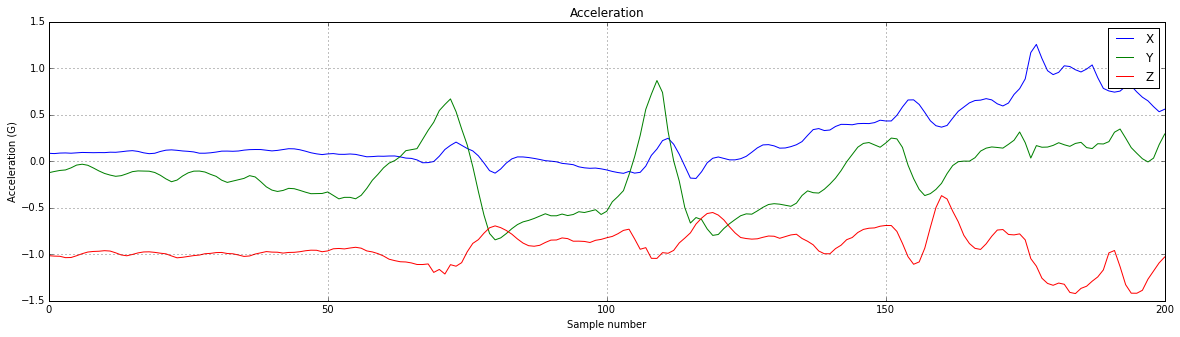

In [24]:
# Create individual plots
create_plot(['accX', 'accY', 'accZ'], 'Acceleration', 'G')
# create_plot(['roll', 'pitch', 'yaw'], 'Rotation', 'radians')
# create_plot(['rotX', 'rotY', 'rotZ'], 'Rotation speed', 'radians / second')
# if pref_plot_gravity:
#     create_plot(['gravX', 'gravY', 'gravZ'], 'Gravity', 'G')
